In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

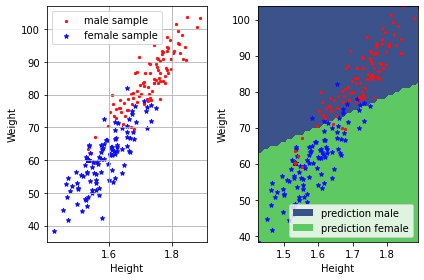

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    w = least_squares(y,tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [4]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    sigma = (1+np.exp(-t))**(-1)
    return sigma

In [25]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    t = tx.dot(w)
    sigma = sigmoid(t)
    loss = y*np.log(sigma)+(1-y)*np.log(1-sigma)
    return -loss.sum()

In [27]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    predictions = sigmoid(tx.dot(w))
    neg_losses_per_datapoitn = y * np.log(predictions) + (1- y) * np.log(1-predictions)
    loss = -neg_losses_per_datapoitn.sum()
    return loss

In [28]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = least_squares(y,tx)
calculate_loss(y,tx,w)

115.39632273179166

In [30]:
def grad_sigmoid(t):
    return sigmoid(t) * (1-sigmoid(t))

In [91]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    predictions = sigmoid(tx.dot(w))
    #predictions = sigmoid(w)
    grad = (predictions - y)* tx
    return grad
    

In [79]:
predictions = sigmoid(tx.dot(w))
predictions.shape
#tx = np.c_[np.ones((y.shape[0], 1)), x]
tx.shape
(predictions - y).shape

(200, 1)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [92]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """

    loss = calculate_loss(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss: TODO
    # ***************************************************
    grad = calculate_gradient(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    w = w - gamma*grad
    ws.append(w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************

    return loss, w

In [90]:
w = np.zeros((tx.shape[1], 1))
w.shape
predictions - y

array([[-0.31973763],
       [ 0.53726258],
       [ 0.51798976],
       [ 0.59411813],
       [-0.33343486],
       [-0.25352726],
       [ 0.6029881 ],
       [ 0.49989826],
       [ 0.53680063],
       [-0.26676029],
       [-0.30834222],
       [ 0.56626858],
       [-0.18802104],
       [ 0.47612035],
       [-0.22040835],
       [-0.40493993],
       [-0.28305189],
       [-0.30550228],
       [-0.27754224],
       [-0.40410844],
       [-0.33241448],
       [ 0.59978849],
       [ 0.56947886],
       [ 0.52880871],
       [ 0.50973304],
       [ 0.50564377],
       [ 0.44727225],
       [-0.34693039],
       [-0.25874843],
       [-0.37662123],
       [ 0.42403781],
       [-0.38754816],
       [-0.30435424],
       [-0.23727919],
       [-0.23524991],
       [ 0.50622734],
       [-0.24203182],
       [ 0.58919518],
       [-0.33749811],
       [ 0.60054415],
       [ 0.54376468],
       [ 0.64772688],
       [ 0.48451637],
       [-0.31047688],
       [-0.32140901],
       [ 0

In [86]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
tx.shape

(200, 3)

Demo!

In [93]:
calculate_gradient(y, tx, w)

array([[-5.00000000e-01,  6.13360419e-01,  4.01061584e-01],
       [ 5.00000000e-01,  5.29250281e-01,  4.84686432e-01],
       [ 5.00000000e-01,  4.90622812e-01,  5.45565977e-01],
       [ 5.00000000e-01,  3.76905861e-01,  2.26436331e-01],
       [-5.00000000e-01, -3.18156589e-01,  7.95961043e-02],
       [-5.00000000e-01,  2.79761196e-01,  6.08345554e-01],
       [ 5.00000000e-01,  2.72775105e-01,  1.62688672e-01],
       [ 5.00000000e-01,  7.43430643e-01,  6.84337504e-01],
       [ 5.00000000e-01,  6.37138823e-01,  5.16945193e-01],
       [-5.00000000e-01,  8.91188738e-01,  7.17533111e-01],
       [-5.00000000e-01,  6.80028179e-02,  2.95843499e-01],
       [ 5.00000000e-01, -2.12506371e-01,  1.65828284e-01],
       [-5.00000000e-01,  3.90500488e-01,  9.95351757e-01],
       [ 5.00000000e-01,  8.17732244e-01,  7.93749225e-01],
       [-5.00000000e-01,  6.33499246e-01,  8.78753842e-01],
       [-5.00000000e-01,  3.62407131e-01, -1.35752132e-02],
       [-5.00000000e-01,  5.15237147e-01

In [94]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

ValueError: operands could not be broadcast together with shapes (3,1) (200,3) 

Calculate your Hessian below

In [82]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    predictions = sigmoid(tx.dot(w))
    hessian = tx.T.dot(predictions * (1-predictions) * tx)
    return hessian
                         

Write a function below to return loss, gradient, and Hessian.

In [ ]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    raise NotImplementedError

### Using Newton's method
Use Newton's method for logistic regression.

In [ ]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

demo

In [ ]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)